### **Business Context**

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to **swiftly and effectively respond to customer input** not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.

As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.

One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - **done in the modern day using Large Language Models and Generative AI.**


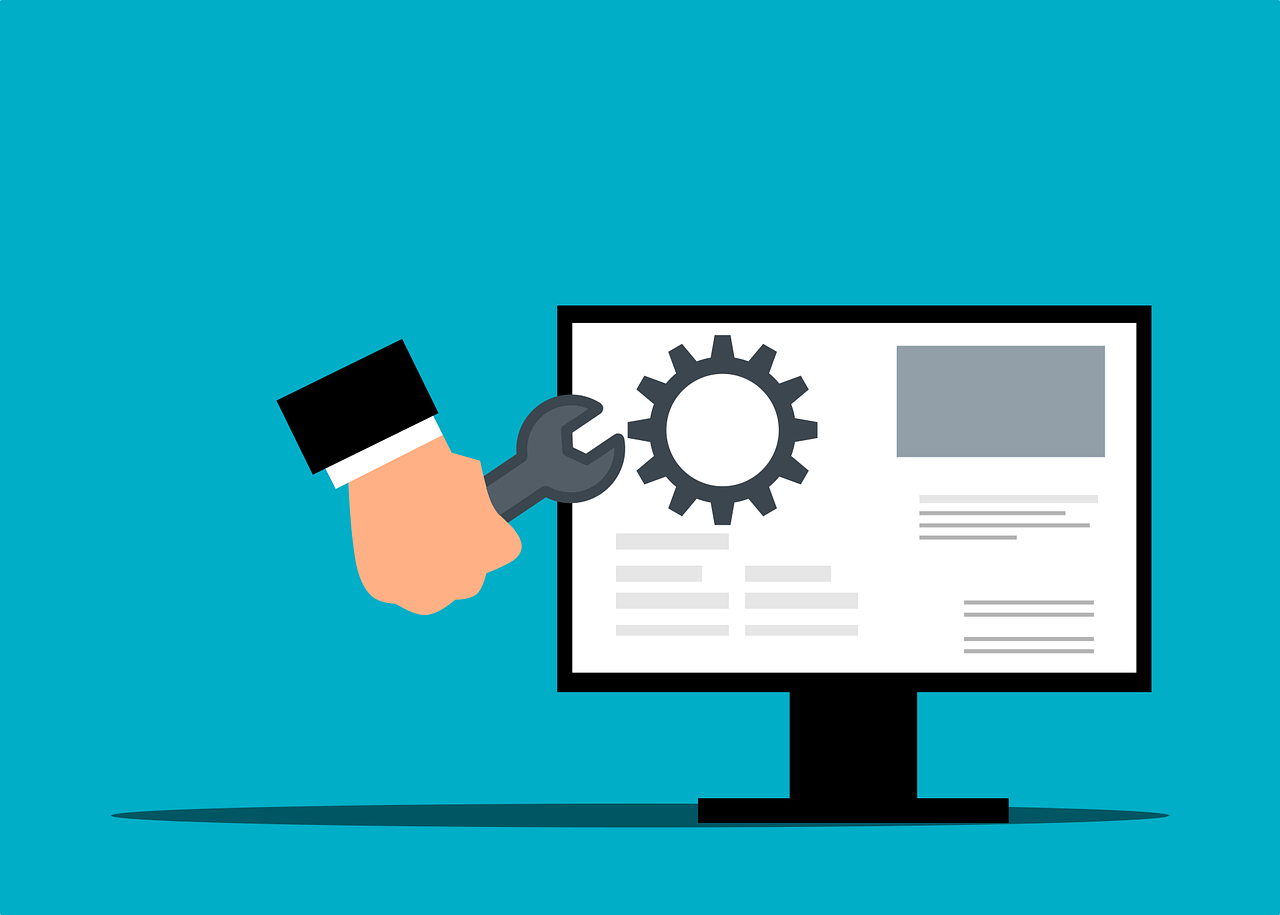

### **Objective**

Develop a Generative AI application using a Large Language Model to **automate the classification and processing of support tickets.** The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured DataFrame.


### **Sample of Expected Output**

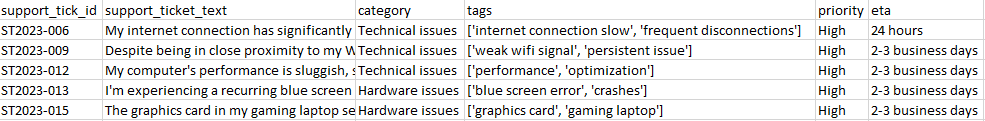

### **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.


### **Installing Necessary Libraries and Dependencies**

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 60.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 274.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 236.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-p

In [ ]:
# Install the hugging face hub
!pip install huggingface_hub -q

### **Q1: Write Python code that imports the 'hf_hub_download' function from the 'huggingface_hub' library and also imports the 'Llama' class from the 'llama_cpp' library.**

**Ensure that the code is correctly formatted and ready for execution.**

In [ ]:
# Importing library for data manipulation
import pandas as pd

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

In [ ]:
# defining the model name or path as a string (You can find this info from hugging face website)
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"

# defining the model basename as a string, indicating it's in the gguf format
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"

In [ ]:
# downloading the model from the Hugging Face Hub using the 'hf_hub_download' function by specifying the 'repo_id' and 'filename'
model_path = hf_hub_download(
    repo_id = model_name_or_path,    # complete the code to mentioned the repo_id
    filename = model_basename    # complete the code to mentioned the filename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
# complete the code to create an instance of the 'Llama' class with specified parameters

lcpp_llm = Llama(
        model_path=model_path,
        n_threads=2,  # CPU cores
        n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
        n_gpu_layers=43,  # Change this value based on your model and your GPU VRAM pool.
        n_ctx=4096,  # Context window
    )

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### **Q2: Define the System Message**

Write a Python function called **generate_llama_response** that takes a single parameter, support_ticket_text, which represents the user's support ticket text. Inside the function, you should perform the following tasks:

Define a system message as a string and assign it to the variable system_message.

- **Combine the support_ticket_text and system_message to create a prompt string.**

*Generate a response from the LLaMA model using the lcpp_llm instance with the following parameters:*

- prompt should be the combined prompt string.
- max_tokens should be set to 256.
- temperature should be set to 0.
- top_p should be set to 0.95.
- repeat_penalty should be set to 1.2.
- top_k should be set to 50.
- stop should be set as a list containing 'INST'.
- echo should be set to False.
Extract and return the response text from the generated response.

Don't forget to provide a value for the system_message variable before using it in the function.



*What content and instructions should be included in the system message to guide the technical assistant when processing support tickets? Please provide a detailed description of the information and guidelines that the system message should contain.*

Here's a detailed breakdown of what should be included:

- **Introduction (System Role):** Begin with an introductory statement that establishes the role of the system message. In this case, it's acting as a guide for a technical assistant.

- **Ticket Categorization:** Explain the primary task of the technical assistant, which is to classify the support ticket into specific categories. In this example, the categories are:
    - Technical Issues
    - Hardware Issues
    - Data Recovery

- **Response Options:** Clearly state that the assistant should only respond with one of the predefined categories, emphasizing that other responses are not acceptable.

- **Sub-Tasks:** Outline the secondary tasks that the technical assistant should perform once the category is identified. These sub-tasks include:
  - **Creating Tags:** Instruct the assistant to create tags that will help further classify the ticket.
  - **Assigning Priority:** Specify that the assistant should assign a priority level (e.g., "High" or "Normal") based on their understanding of the text.
  - **Suggesting ETA:** Guide the assistant to provide an estimated time for
resolving the issue mentioned in the ticket.

- **General Instructions:** Offer general instructions that should be followed throughout the ticket processing, such as:

  - **Categorization:** Reiterate that the assistant should categorize the ticket only into the predefined categories.
  - **Reading Carefully:** Stress the importance of reading the support ticket text thoroughly and considering the overall sentiment before assigning priority.
  - **Output Format:** Clearly specify the desired output format for the responses generated by the assistant. In this case, the output should be in JSON format.

**The output of the model should be in JSON format**

In [ ]:
def generate_llama_response(instruction, support_ticket_text):

    # System message
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{support_ticket_text}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=256,    # complete the code to set the max tokens to generate
        temperature=0,    # complete the code to set the temperature (between 0 and 1)
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text

### **Q3: Loading the Dataset**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the CSV file into a DataFrame and store it in the 'data' variable
data=pd.read_csv('/content/drive/MyDrive/Project/support_ticket_data.csv')

### **Data Overview**

In [ ]:
# Check the first 5 rows of the data
data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


In [ ]:
# Check the shape of the data
data.shape

(21, 2)

In [ ]:
# Check for missing values in the data
data.isnull().sum()

support_tick_id        0
support_ticket_text    0
dtype: int64

### Prompt 1: Sentiment Analysis

In [ ]:
data_1=data.copy()

In [ ]:
#defining instructions for the model
instruction_1="""
  You are an AI analyzing support tickets. Classify each ticket based on the 'support_ticket_text' column into the following categories:
  - Technical Issue
  - Hardware Issue
  - Data Recovery
"""

In [ ]:
data_1['model_response']=data_1['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_1,x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
data_1['model_response'].head()

0     Sure, I can help you with that! Based on the ...
1     Sure, I can help you with that! Based on the ...
2     Sure, I can help you with that! Based on the ...
3     Sure, I can help you with that! Based on the ...
4     Sure, I can help you with that! Based on your...
Name: model_response, dtype: object

In [ ]:
i=2
print(data_1.loc[i,'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [ ]:
print(data_1.loc[i,'model_response'])

 Sure, I can help you with that! Based on the support ticket text you provided, here is my classification of each category:

1. Technical Issue: None of the tickets mention any technical issues.
2. Hardware Issue: None of the tickets mention any hardware issues either.
3. Data Recovery: This ticket belongs to the data recovery category because it mentions accidentally deleting essential work documents, which requires data recovery assistance.

So, there is only one ticket that falls under the data recovery category.


In [ ]:
def extract_category(model_response):
    if 'technical issue' in model_response.lower():
        return 'Technical Issue'
    elif 'hardware issue' in model_response.lower():
        return 'Hardware Issue'
    elif 'data recovery' in model_response.lower():
        return 'Data Recovery'

In [ ]:
data_1['category']=(data_1['model_response']).apply(extract_category)
data_1.head()

,support_tick_id,support_ticket_text,model_response,category
0,ST2023-006,My internet connection has significantly slowe...,"Sure, I can help you with that! Based on the ...",Technical Issue
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"Sure, I can help you with that! Based on the ...",Technical Issue
2,ST2023-008,I've accidentally deleted essential work docum...,"Sure, I can help you with that! Based on the ...",Technical Issue
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"Sure, I can help you with that! Based on the ...",Technical Issue
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","Sure, I can help you with that! Based on your...",Hardware Issue


In [ ]:
data_1['category'].value_counts()

Technical Issue    15
Hardware Issue      4
Data Recovery       2
Name: category, dtype: int64

In [ ]:
final_data_1=data_1.drop(['model_response'], axis=1)
final_data_1.head()

,support_tick_id,support_ticket_text,category
0,ST2023-006,My internet connection has significantly slowe...,Technical Issue
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Technical Issue
2,ST2023-008,I've accidentally deleted essential work docum...,Technical Issue
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issue
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issue


**Observations**
* When issuing the response for the prompt the model assigns the proper categories.
* However, based on some support tickets, they may be miscategorized.

### Prompt 2: Sentiment Analysis and Returning Structured Output

In [ ]:
data_2=data.copy()

In [ ]:
instruction_2="""
  You are an AI analyzing support tickets, your task is to classify the given text into one of the following categories:
  - Technical Issue
  - Hardware Issue
  - Data Recovery

    Format the output as a JSON object with a single key-value pair as shown below:
    {"category": "one of the provided categories"}

  Note: Each support ticket requires a category to be assigned. Predict the closest category available for each support ticket
"""

In [ ]:
data_2['model_response']=data_2['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_2,x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
data_2['model_response'].head()

0     Sure, I'd be happy to help! Based on the give...
1      {\n       "category": "Hardware Issue"\n      }
2     Sure, I'd be happy to help! Based on the text...
3     Sure, I'd be happy to help! Based on the text...
4     Sure, I'd be happy to help! Based on the text...
Name: model_response, dtype: object

In [ ]:
i=2
print(data_2.loc[i,'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [ ]:
print(data_2.loc[i,'model_response'])

 Sure, I'd be happy to help! Based on the text you provided, I would classify it as follows:

{"category": "Data Recovery"}


In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [ ]:
# applying the function to the model response
data_2['model_response_parsed'] = data_2['model_response'].apply(extract_json_data)
data_2['model_response_parsed'].head()

0    {'category': 'Technical Issue'}
1     {'category': 'Hardware Issue'}
2      {'category': 'Data Recovery'}
3    {'category': 'Technical Issue'}
4     {'category': 'Hardware Issue'}
Name: model_response_parsed, dtype: object

In [ ]:
model_response_parsed_df_2 = pd.json_normalize(data_2['model_response_parsed'])
model_response_parsed_df_2.head()

,category
0,Technical Issue
1,Hardware Issue
2,Data Recovery
3,Technical Issue
4,Hardware Issue


In [ ]:
data_with_parsed_model_output_2 = pd.concat([data_2, model_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,category
0,ST2023-006,My internet connection has significantly slowe...,"Sure, I'd be happy to help! Based on the give...",{'category': 'Technical Issue'},Technical Issue
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""category"": ""Hardware Issue""\n }",{'category': 'Hardware Issue'},Hardware Issue
2,ST2023-008,I've accidentally deleted essential work docum...,"Sure, I'd be happy to help! Based on the text...",{'category': 'Data Recovery'},Data Recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"Sure, I'd be happy to help! Based on the text...",{'category': 'Technical Issue'},Technical Issue
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","Sure, I'd be happy to help! Based on the text...",{'category': 'Hardware Issue'},Hardware Issue


In [ ]:
final_data_2 = data_with_parsed_model_output_2.drop(['model_response','model_response_parsed'], axis=1)
final_data_2.head(21)

,support_tick_id,support_ticket_text,category
0,ST2023-006,My internet connection has significantly slowe...,Technical Issue
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issue
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issue
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issue
5,ST2023-011,I'm locked out of my online banking account an...,Technical Issue
6,ST2023-012,"My computer's performance is sluggish, severel...",Technical Issue
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware Issue
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware Issue


In [ ]:
final_data_2['category'].value_counts()

Technical Issue    8
Data Recovery      7
Hardware Issue     6
Name: category, dtype: int64

**Observations**
* The revised prompt improved the performance of the output where it's recognizing and providing the proper categories more accurately.

### Prompt 3: Identifying categories, assigning tags, priority, and suggested ETA

In [ ]:
data_3=data.copy()

In [ ]:
instruction_3="""
  You are an AI analyzing support tickets, your task is to classify the given text into one of the following categories:
  - Technical Issue
  - Hardware Issue
  - Data Recovery

  Once the category is identified, perform the following sub-tasks:
  - Creating Tags: Generate tags that provide additional context for further classification.
  - Assigning Priority: Set a priority level (e.g., "High" or "Normal) based on your understanding of the ticket.
  - Suggesting ETA: Provide an estimated time for resolving the issue mentioned in the ticket.

  Format the output as a JSON object with a single key-value pair as shown below:
  {
    "Category": "one of the provided categories",
    "Tags": "[a tag, another tag, etc.]",
    "Priority": "High or Normal",
    "ETA": "time the model thinks is necessary to fix the issue"
  }

  Note: Each support ticket requires a category, tags, priority, and ETA to be assigned. Predict the closest value available for each support ticket.
  Only return the JSON, do not return any other information.

"""

In [ ]:
data_3['model_response']=data_3['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_3,x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
data_3['model_response'].head()

0     {\n    "Category": "Technical Issue",\n    "T...
1     {\n"Category": "Hardware Issue",\n"Tags": ["L...
2     {\n       "Category": "Data Recovery",\n     ...
3     {\n       "Category": "Technical Issue",\n   ...
4     {\n       "Category": "Hardware Issue",\n    ...
Name: model_response, dtype: object

In [ ]:
i=2
print(data_3.loc[i,'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [ ]:
print(data_3.loc[i, 'model_response'])

 {
       "Category": "Data Recovery",
       "Tags": ["Deleted Files", "Essential Documents"],
       "Priority": "High",
       "ETA": "2-3 business days"
      }


In [ ]:
data_3['model_response_parsed']=data_3['model_response'].apply(extract_json_data)
data_3['model_response_parsed'].head()

0    {'Category': 'Technical Issue', 'Tags': ['Inte...
1    {'Category': 'Hardware Issue', 'Tags': ['Lapto...
2    {'Category': 'Data Recovery', 'Tags': ['Delete...
3    {'Category': 'Technical Issue', 'Tags': ['Wi-F...
4    {'Category': 'Hardware Issue', 'Tags': ['batte...
Name: model_response_parsed, dtype: object

In [ ]:
model_response_parsed_df_3=pd.json_normalize(data_3['model_response_parsed'])
model_response_parsed_df_3.head()

,Category,Tags,Priority,ETA
0,Technical Issue,"[Internet Connection, Speed, Disruptions]",High,2-3 business days
1,Hardware Issue,"[Laptop, Startup, Restart]",High,2-3 business days
2,Data Recovery,"[Deleted Files, Essential Documents]",High,2-3 business days
3,Technical Issue,"[Wi-Fi, Signal Strength]",High,24 hours
4,Hardware Issue,"[battery issue, rapid drain]",High,2-3 business days


In [ ]:
data_with_parsed_model_output_3 = pd.concat([data_3, model_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Category,Tags,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Technical Issue"",\n ""T...","{'Category': 'Technical Issue', 'Tags': ['Inte...",Technical Issue,"[Internet Connection, Speed, Disruptions]",High,2-3 business days
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n""Category"": ""Hardware Issue"",\n""Tags"": [""L...","{'Category': 'Hardware Issue', 'Tags': ['Lapto...",Hardware Issue,"[Laptop, Startup, Restart]",High,2-3 business days
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ...","{'Category': 'Data Recovery', 'Tags': ['Delete...",Data Recovery,"[Deleted Files, Essential Documents]",High,2-3 business days
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Technical Issue"",\n ...","{'Category': 'Technical Issue', 'Tags': ['Wi-F...",Technical Issue,"[Wi-Fi, Signal Strength]",High,24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware Issue"",\n ...","{'Category': 'Hardware Issue', 'Tags': ['batte...",Hardware Issue,"[battery issue, rapid drain]",High,2-3 business days


In [ ]:
final_data_3 = data_with_parsed_model_output_3.drop(['model_response','model_response_parsed'], axis=1)
final_data_3.head()

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,Technical Issue,"[Internet Connection, Speed, Disruptions]",High,2-3 business days
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issue,"[Laptop, Startup, Restart]",High,2-3 business days
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[Deleted Files, Essential Documents]",High,2-3 business days
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issue,"[Wi-Fi, Signal Strength]",High,24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issue,"[battery issue, rapid drain]",High,2-3 business days


In [ ]:
final_data_3['Category'].value_counts()

Technical Issue    9
Data Recovery      7
Hardware Issue     5
Name: Category, dtype: int64

In [ ]:
final_data_3['Tags'].value_counts()

[Internet Connection, Speed, Disruptions]                1
[Computer Hardware, Screen Issues]                       1
[Internet Connection, Speed, Disconnections]             1
[External Hard Drive, Recovery, Vital Data]              1
[USB Drive, Formatted, Crucial Files]                    1
[Wi-Fi, connectivity, router]                            1
[Internet Connection, Drop, Frequent]                    1
[Laptop, Touchpad, Not Working]                          1
[USB Flash Drive, Critical Files, Physically Damaged]    1
[Water Damage, Laptop]                                   1
[USB Drive, Critical Files, Formatted]                   1
[Laptop, Startup, Restart]                               1
[Graphics Card, Gaming Performance]                      1
[External Hard Drive, Vital Data, Recovery]              1
[Blue Screen Error, Crashes, Frequent Crashes]           1
[Computer Performance, Optimization]                     1
[password reset, online banking]                        

In [ ]:
final_data_3['Priority'].value_counts()

High    21
Name: Priority, dtype: int64

In [ ]:
final_data_3['ETA'].value_counts()

2-3 business days    18
24 hours              1
1-2 business days     1
2 hours               1
Name: ETA, dtype: int64

**Observations**
* I added subtasks for the model to recognize and assign categories, tags, priorities, and ETA.
* Each ticket resulted in unique tags.
* All tickets were assigned a 'High' level of priority
* The model determined most tickets would be resolved in 2-3 business days.

### Prompt 4: Enhancing prompt to specify structure of sub-tasks and generate a response to the tickets

In [ ]:
data_4=data.copy()

In [ ]:
instruction_4="""

  You are an AI analyzing support tickets. Your task is to classify the given text into one of the following categories:
  - Technical Issue
  - Hardware Issue
  - Data Recovery

  Once the category is identified, perform the following sub-tasks:
  - Creating Tags: Generate tags that provide additional context for further classification.
  - Assigning Priority: Set a priority level (e.g., "Low, Medium, or High") based on your understanding of the ticket.
  - Suggesting ETA: Provide an estimated time for resolving the issue mentioned in the ticket.
  - Responding to the ticket: Respond to the user with a helpful message based on the submitted support ticket. If more information is required, ask accordingly.

  Format the output as a JSON object with the following key-value pairs:
  {
    "Category": "one of the provided categories",
    "Tags": ["a tag", "another tag", etc.],
    "Priority": "Low, Medium, or High",
    "ETA": "time the model thinks is necessary to fix the issue",
    "Response": "your response to the support ticket"
  }

  Important Instructions:
  - Ensure that the model outputs a valid JSON object for every support ticket.
  - Provide a category, tags, priority, ETA, and response for each support ticket.
  - In cases of uncertainty, make a best effort to categorize and provide relevant information.
  - Avoid generating NaN values; instead, use a default category or placeholder if certainty is low.


  Only return the JSON, do not return any other information.

"""


In [ ]:
data_4['model_response']=data_4['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_4,x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
data_4['model_response'].head()

0     {\n    "Category": "Technical Issue",\n    "T...
1     {\n"Category": "Hardware Issue",\n"Tags": ["l...
2     {\n       "Category": "Data Recovery",\n     ...
3     {\n    "Category": "Technical Issue",\n    "T...
4     {\n       "Category": "Hardware Issue",\n    ...
Name: model_response, dtype: object

In [ ]:
i = 2
print(data_4.loc[i, 'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [ ]:
print(data_4.loc[i, 'model_response'])

 {
       "Category": "Data Recovery",
       "Tags": ["deleted documents", "data loss"],
       "Priority": "High",
       "ETA": "2-3 business days",
       "Response": "We understand the urgency of recovering your deleted documents. Our data recovery team will work on this issue with high priority, and we estimate a resolution time of 2-3 business days. Please provide any additional information or context that may help in the recovery process."
     }


In [ ]:
# applying the function to the model response
data_4['model_response_parsed'] = data_4['model_response'].apply(extract_json_data)
data_4['model_response_parsed'].head()

0    {'Category': 'Technical Issue', 'Tags': ['inte...
1    {'Category': 'Hardware Issue', 'Tags': ['lapto...
2    {'Category': 'Data Recovery', 'Tags': ['delete...
3    {'Category': 'Technical Issue', 'Tags': ['Wi-F...
4    {'Category': 'Hardware Issue', 'Tags': ['batte...
Name: model_response_parsed, dtype: object

In [ ]:
model_response_parsed_df_4= pd.json_normalize(data_4['model_response_parsed'])
model_response_parsed_df_4.head()

,Category,Tags,Priority,ETA,Response
0,Technical Issue,"[internet connection, slow speed]",Medium,2-3 business days,Thank you for reaching out to us. We apologize...
1,Hardware Issue,"[laptop, startup, restart]",Medium,2-3 business days,I apologize for the inconvenience you're exper...
2,Data Recovery,"[deleted documents, data loss]",High,2-3 business days,We understand the urgency of recovering your d...
3,Technical Issue,"[Wi-Fi, signal strength]",Medium,24 hours,Thank you for reaching out to us. We're sorry ...
4,Hardware Issue,"[battery issue, rapid drain]",Medium,2-3 business days,Thank you for reaching out to us. Based on the...


In [ ]:
data_with_parsed_model_output_4 = pd.concat([data_4, model_response_parsed_df_4], axis=1)
data_with_parsed_model_output_4.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Category,Tags,Priority,ETA,Response
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Technical Issue"",\n ""T...","{'Category': 'Technical Issue', 'Tags': ['inte...",Technical Issue,"[internet connection, slow speed]",Medium,2-3 business days,Thank you for reaching out to us. We apologize...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n""Category"": ""Hardware Issue"",\n""Tags"": [""l...","{'Category': 'Hardware Issue', 'Tags': ['lapto...",Hardware Issue,"[laptop, startup, restart]",Medium,2-3 business days,I apologize for the inconvenience you're exper...
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ...","{'Category': 'Data Recovery', 'Tags': ['delete...",Data Recovery,"[deleted documents, data loss]",High,2-3 business days,We understand the urgency of recovering your d...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Technical Issue"",\n ""T...","{'Category': 'Technical Issue', 'Tags': ['Wi-F...",Technical Issue,"[Wi-Fi, signal strength]",Medium,24 hours,Thank you for reaching out to us. We're sorry ...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware Issue"",\n ...","{'Category': 'Hardware Issue', 'Tags': ['batte...",Hardware Issue,"[battery issue, rapid drain]",Medium,2-3 business days,Thank you for reaching out to us. Based on the...


In [ ]:
final_data_4 = data_with_parsed_model_output_4.drop(['model_response','model_response_parsed'], axis=1)
final_data_4.head(21)

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA,Response
0,ST2023-006,My internet connection has significantly slowe...,Technical Issue,"[internet connection, slow speed]",Medium,2-3 business days,Thank you for reaching out to us. We apologize...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issue,"[laptop, startup, restart]",Medium,2-3 business days,I apologize for the inconvenience you're exper...
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[deleted documents, data loss]",High,2-3 business days,We understand the urgency of recovering your d...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issue,"[Wi-Fi, signal strength]",Medium,24 hours,Thank you for reaching out to us. We're sorry ...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issue,"[battery issue, rapid drain]",Medium,2-3 business days,Thank you for reaching out to us. Based on the...
5,ST2023-011,I'm locked out of my online banking account an...,Technical Issue,"[password reset, online banking]",High,2 hours,"Dear [User], I apologize for the inconvenience..."
6,ST2023-012,"My computer's performance is sluggish, severel...",Technical Issue,"[computer performance, optimization]",Medium,2-3 business days,Thank you for reaching out to us. Based on you...
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware Issue,"[Blue Screen Error, Crashes, Frequent Crashes]",Medium,2-3 business days,Thank you for reaching out to us. Based on the...
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery,"[External Hard Drive, Data Recovery]",High,2-3 business days,I understand that your external hard drive is ...
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware Issue,"[Graphics Card, Gaming Laptop]",Medium,2-3 business days,Thank you for reaching out to us with your har...


In [ ]:
final_data_4['Category'].value_counts()

Technical Issue    9
Data Recovery      7
Hardware Issue     5
Name: Category, dtype: int64

In [ ]:
final_data_4['Tags'].value_counts()

[internet connection, slow speed]                        1
[computer screen black, cannot fix]                      1
[Internet Connection, Speed, Disconnections]             1
[data recovery, external hard drive]                     1
[USB drive, formatted, crucial files]                    1
[Wi-Fi, inconsistent, proximity, router]                 1
[internet connection, dropping]                          1
[laptop, touchpad, not working]                          1
[USB flash drive, physically damaged, critical files]    1
[water damage, laptop, data recovery]                    1
[USB drive, critical work files, data recovery]          1
[laptop, startup, restart]                               1
[Graphics Card, Gaming Laptop]                           1
[External Hard Drive, Data Recovery]                     1
[Blue Screen Error, Crashes, Frequent Crashes]           1
[computer performance, optimization]                     1
[password reset, online banking]                        

In [ ]:
final_data_4['Priority'].value_counts()

Medium    12
High       9
Name: Priority, dtype: int64

In [ ]:
final_data_4['ETA'].value_counts()

2-3 business days    17
24 hours              2
2 hours               2
Name: ETA, dtype: int64

**Observations**
* The prompt was further enhanced by instructing the model to respond based on the ticket submitted.
* The priorities were disbursed between medium and high level's of priority.
* The ETA changed from 4 unique values to 3 unique values. 2-3 business days still remains the majority ETA the model predicts for resolution.

###Share your observations and insights from this exercise, and your recommendations for a business looking to adopt a solution such as this.**

**Conclusions**

  I used the Llama LLM to do mutliple tasks in gradual stages to see how the model improves providing the requested outputs.

  1.   I first identified the categories of the submitted tickets.
  2.   Using the same prompt, I improved upon it by requesting the model to format the output in JSON.
  3. Once the JSON format was established, the prompt was enhanced to add subtasks by identifying tags, priority, and ETA.
  4. Since the model has recognized the categories and subtasks of each ticket, the prompt was improved for the model to provide a response for each submitted ticket.


**Observations and recommendations**
* Throughout the process, I was running into issues where JSON formatting wasn't recognized or NaN values would be outputed. In order to avoid those issues, I troubleshooted by constant revision of the prompt and ensuring specificity to receive the desired output.
* If the desired output isn't being reached model parameters can be updated, however, I'd first recommend trying a different large language model to see if performance improves.







---

